<a href="https://colab.research.google.com/github/DavisCode2/Deep-Learning-Using-Keras/blob/main/maths_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
print("hello world")

hello world


In [12]:
%pip install keras-hub==0.21.1 keras --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00


In [13]:
import os
os.environ["KERAS BACKEND"] = "tensorflow"

In [14]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS BACKEND to {required} at the top of the notebook, restart the runtime, and rerun the notebook."
        )

In [15]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

/usr/local/lib/python3.12/dist-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
len(train_labels)

60000

In [18]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
len(test_labels)

10000

In [21]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [22]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [23]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [24]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [25]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9235 - loss: 0.2697
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9686 - loss: 0.1078
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9794 - loss: 0.0711
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9851 - loss: 0.0506
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9897 - loss: 0.0359


In [26]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([7.2759889e-07, 1.0072210e-09, 5.4539428e-06, 1.7150720e-05,
       1.9767944e-10, 3.0117953e-08, 7.2092923e-13, 9.9996692e-01,
       1.1167559e-06, 8.5137035e-06], dtype=float32)

In [27]:
predictions[0].argmax()

np.int64(7)

In [28]:
predictions[0][7]

np.float32(0.9999669)

In [29]:
test_labels[0]

np.uint8(7)

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0741
test_acc: 0.9785000085830688


In [31]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np

x = np.array(12)
x.ndim

0

In [33]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [34]:
x = np.array([[5, 78, 2, 34, 0],
[6, 79, 3, 35, 1],
[7, 80, 4, 36, 2]])
x.ndim

2

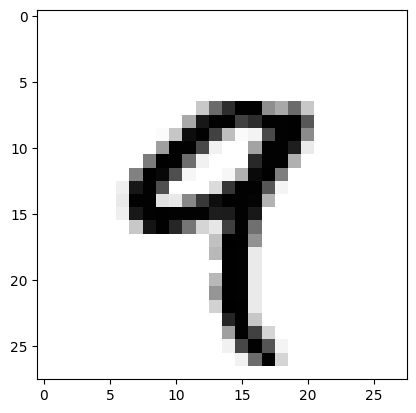

In [36]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit.reshape((28, 28)), cmap=plt.cm.binary)
plt.show()

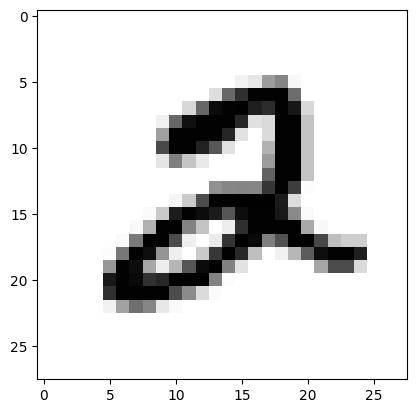

In [37]:
import matplotlib.pyplot as plt

next_digit = train_images[5]
plt.imshow(next_digit.reshape((28, 28)), cmap=plt.cm.binary)
plt.show()

In [38]:
train_labels[4]

np.uint8(9)

In [40]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [41]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [42]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [43]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)